In [1]:
from google.colab import files

uploaded = files.upload()


Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [3]:
data=pd.read_csv('compresive_strength_concrete.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

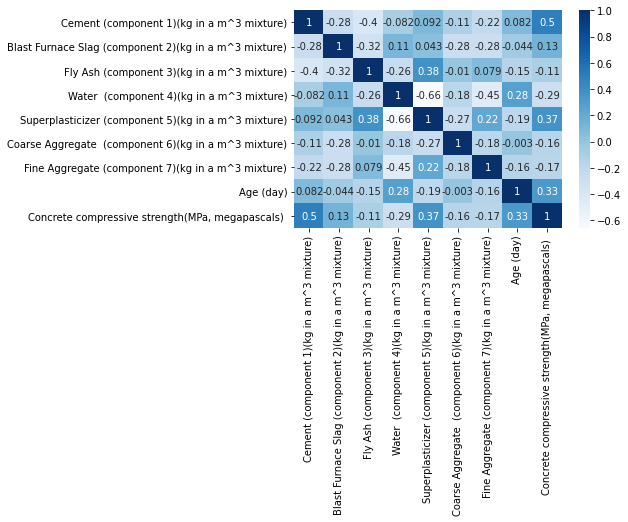

In [11]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [12]:
X = data.iloc[:,:-1]  
y = data.iloc[:,-1]  

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

In [17]:
sc = StandardScaler() 

In [24]:
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
X_train.shape

(824, 8)

In [40]:
model=models.Sequential()
model.add(layers.Dense( 10, activation= 'relu',input_shape=(8,)))
model.add(layers.Dense(8))

model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train,epochs=200)

Epoch 1/200
26/26 [==============================] - 0s 980us/step - loss: 1538.9242
Epoch 2/200
26/26 [==============================] - 0s 904us/step - loss: 1421.8722
Epoch 3/200
26/26 [==============================] - 0s 943us/step - loss: 1440.1757
Epoch 4/200
26/26 [==============================] - 0s 1ms/step - loss: 1411.6090
Epoch 5/200
26/26 [==============================] - 0s 989us/step - loss: 1310.4832
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 1180.2279
Epoch 7/200
26/26 [==============================] - 0s 1ms/step - loss: 1029.6237
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 963.0080
Epoch 9/200
26/26 [==============================] - 0s 964us/step - loss: 798.8090
Epoch 10/200
26/26 [==============================] - 0s 1ms/step - loss: 782.7214
Epoch 11/200
26/26 [==============================] - 0s 1ms/step - loss: 584.1487
Epoch 12/200
26/26 [==============================] - 0s 1ms/step - loss: 544.1

In [43]:
x=model.predict(X_test
               )
x

array([[29.590387],
       [35.498257],
       [17.68672 ],
       [26.494745],
       [35.969135],
       [38.19215 ],
       [32.482334],
       [46.442837],
       [20.444878],
       [14.830559],
       [24.137901],
       [34.40369 ],
       [52.850113],
       [44.550606],
       [31.028542],
       [52.850113],
       [26.244698],
       [37.798504],
       [60.526604],
       [31.64158 ],
       [21.479172],
       [25.53313 ],
       [33.47037 ],
       [18.018316],
       [38.273693],
       [26.698296],
       [41.031612],
       [30.947561],
       [20.539047],
       [24.146967],
       [48.65704 ],
       [25.273485],
       [27.016382],
       [49.249096],
       [52.055176],
       [25.39345 ],
       [35.352962],
       [18.839891],
       [34.955574],
       [27.050945],
       [56.26347 ],
       [31.698645],
       [22.357122],
       [37.566807],
       [42.528675],
       [31.129568],
       [24.49642 ],
       [17.229933],
       [55.67158 ],
       [34.44711 ],


In [33]:
y_test

456    43.39
988    16.50
809    19.69
581    12.37
549    41.68
       ...  
839    26.86
455    51.26
691     6.81
934    22.93
172    65.20
Name: Concrete compressive strength(MPa, megapascals) , Length: 206, dtype: float64